# Multi-Level Statistical Model for Forecasting Solar Radiation  

Team 14 Members

191IT241 - Pratham Nayak  
191IT209 - Aprameya Dash  
191IT109 - Suyash Chintawar


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from collections import defaultdict

## Reading the dataset

In [2]:
df = pd.read_csv('SolarPrediction.csv')
display(df)

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


## Cleaning the dataset

In [3]:
df = df.drop(['UNIXTime'], axis=1)

In [4]:
def func_date(data):
  
    data = data.split()
    data = data[0]
    data = data.split('/') 

    day = int(data[1])
    month = int(data[0])
    year = int(data[2])

    date1 = date(year-1, 12, 31)
    date2 = date(year, month, day)
    diff = date2 - date1
    diff = str(diff)
    diff = diff.split(' ')

    return int(diff[0])

def func_time(data):
    data = data.split(':')
    time = int(data[0])*3600 + int(data[1])*60 + int(data[2])
    return time

In [5]:
df['Date'] = df['Date'].apply(func_date) 
df['Time'] = df['Time'].apply(func_time) 
df['TimeSunRise'] = df['TimeSunRise'].apply(func_time) 
df['TimeSunSet'] = df['TimeSunSet'].apply(func_time) 
display(df)

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,273,86126,1.21,48,30.46,59,177.39,5.62,22380,65580
1,273,85823,1.21,48,30.46,58,176.78,3.37,22380,65580
2,273,85526,1.23,48,30.46,57,158.75,3.37,22380,65580
3,273,85221,1.21,48,30.46,60,137.71,3.37,22380,65580
4,273,84924,1.17,48,30.46,62,104.95,5.62,22380,65580
...,...,...,...,...,...,...,...,...,...,...
32681,336,1204,1.22,44,30.43,102,145.42,6.75,24060,63720
32682,336,901,1.17,44,30.42,102,117.78,6.75,24060,63720
32683,336,601,1.20,44,30.42,102,145.19,9.00,24060,63720
32684,336,302,1.23,44,30.42,101,164.19,7.87,24060,63720


## Summarizing the dataset

In [6]:
df.describe()

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,306.110965,43277.574068,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,23258.431133,64691.463624
std,34.781367,24900.749819,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,931.122823,995.053346
min,245.000000,1.000000,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,22020.000000,63720.000000
25%,277.000000,21617.000000,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,22440.000000,63900.000000
50%,306.000000,43230.000000,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,23040.000000,64260.000000
75%,334.000000,64849.000000,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,24000.000000,65340.000000
max,366.000000,86185.000000,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,25020.000000,67080.000000


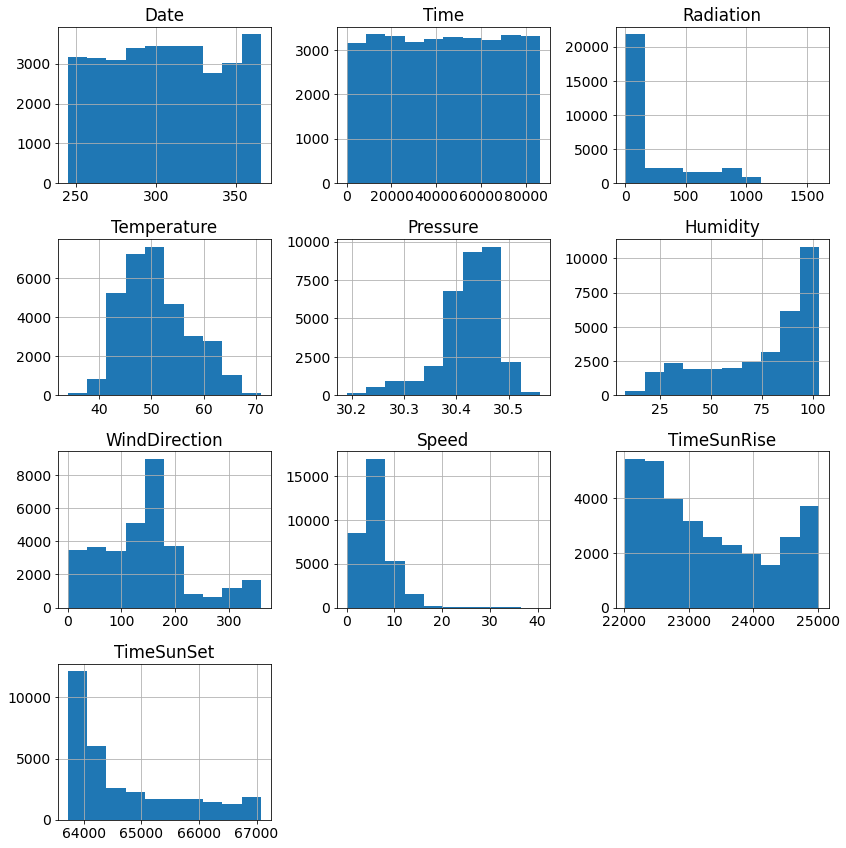

In [7]:
plt.rcParams["font.size"] = 14
df.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

## Feature Selection

### Correlation Matrix

In [8]:
display(df.corr(method='pearson'))

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
Date,1.000000,-0.007094,-0.081320,-0.370794,-0.332762,-0.063760,0.153255,0.174336,0.981939,-0.847401
Time,-0.007094,1.000000,0.004348,0.197227,0.091066,0.077851,-0.077956,-0.057908,-0.006639,0.008038
Radiation,-0.081320,0.004348,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.092850,0.045688
Temperature,-0.370794,0.197227,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.380968,0.285131
Pressure,-0.332762,0.091066,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.380399,0.146884
Humidity,-0.063760,0.077851,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.023955,0.135243
WindDirection,0.153255,-0.077956,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.176929,-0.068040
Speed,0.174336,-0.057908,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.167075,-0.159400
TimeSunRise,0.981939,-0.006639,-0.092850,-0.380968,-0.380399,-0.023955,0.176929,0.167075,1.000000,-0.738271
TimeSunSet,-0.847401,0.008038,0.045688,0.285131,0.146884,0.135243,-0.068040,-0.159400,-0.738271,1.000000


### Correlation Heatmap

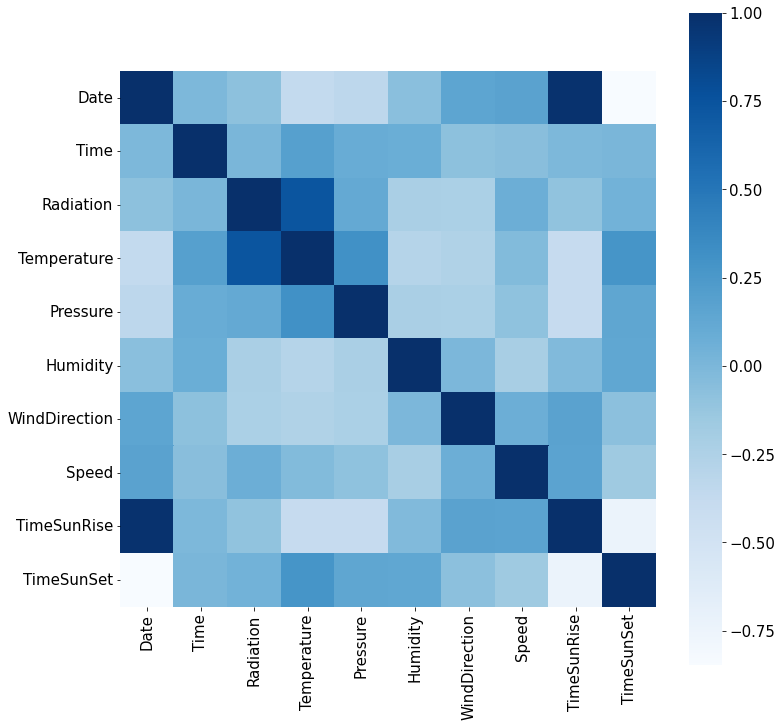

In [9]:
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["font.size"] = 15

sns.heatmap(df.corr(), square=True, cmap='Blues')
plt.show()

### Scatter Plot

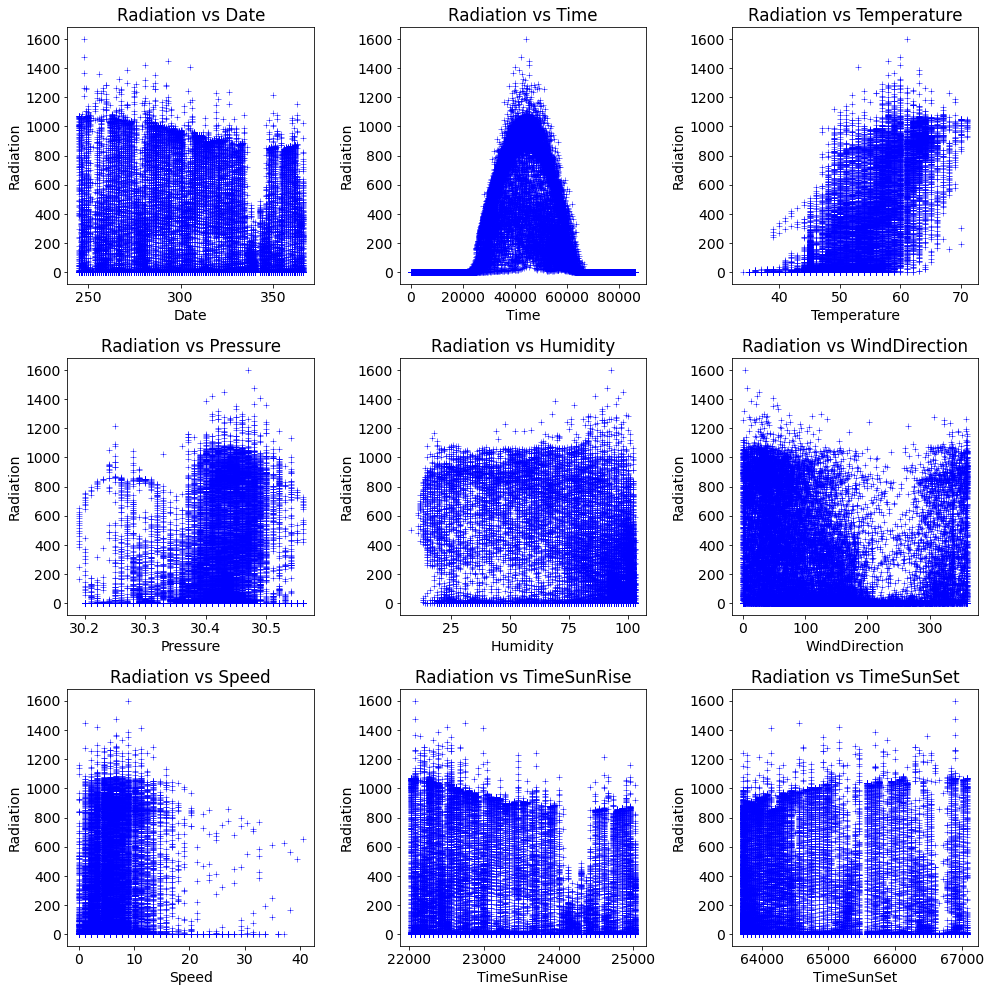

In [10]:
plt.rcParams["figure.figsize"] = (14, 14)
plt.rcParams["font.size"] = 14

ylabel = 'Radiation'
columns = ['Date', 'Time', 'Temperature',	'Pressure',	'Humidity',	'WindDirection',	'Speed',	'TimeSunRise',	'TimeSunSet']

for index, xlabel in enumerate(columns):
  plt.subplot(3, 3, index+1)
  plt.scatter(df[xlabel], df[ylabel],color='blue',marker='+',linewidth=0.5)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(ylabel + ' vs ' + xlabel)

plt.tight_layout()

### Hourly Average Plots

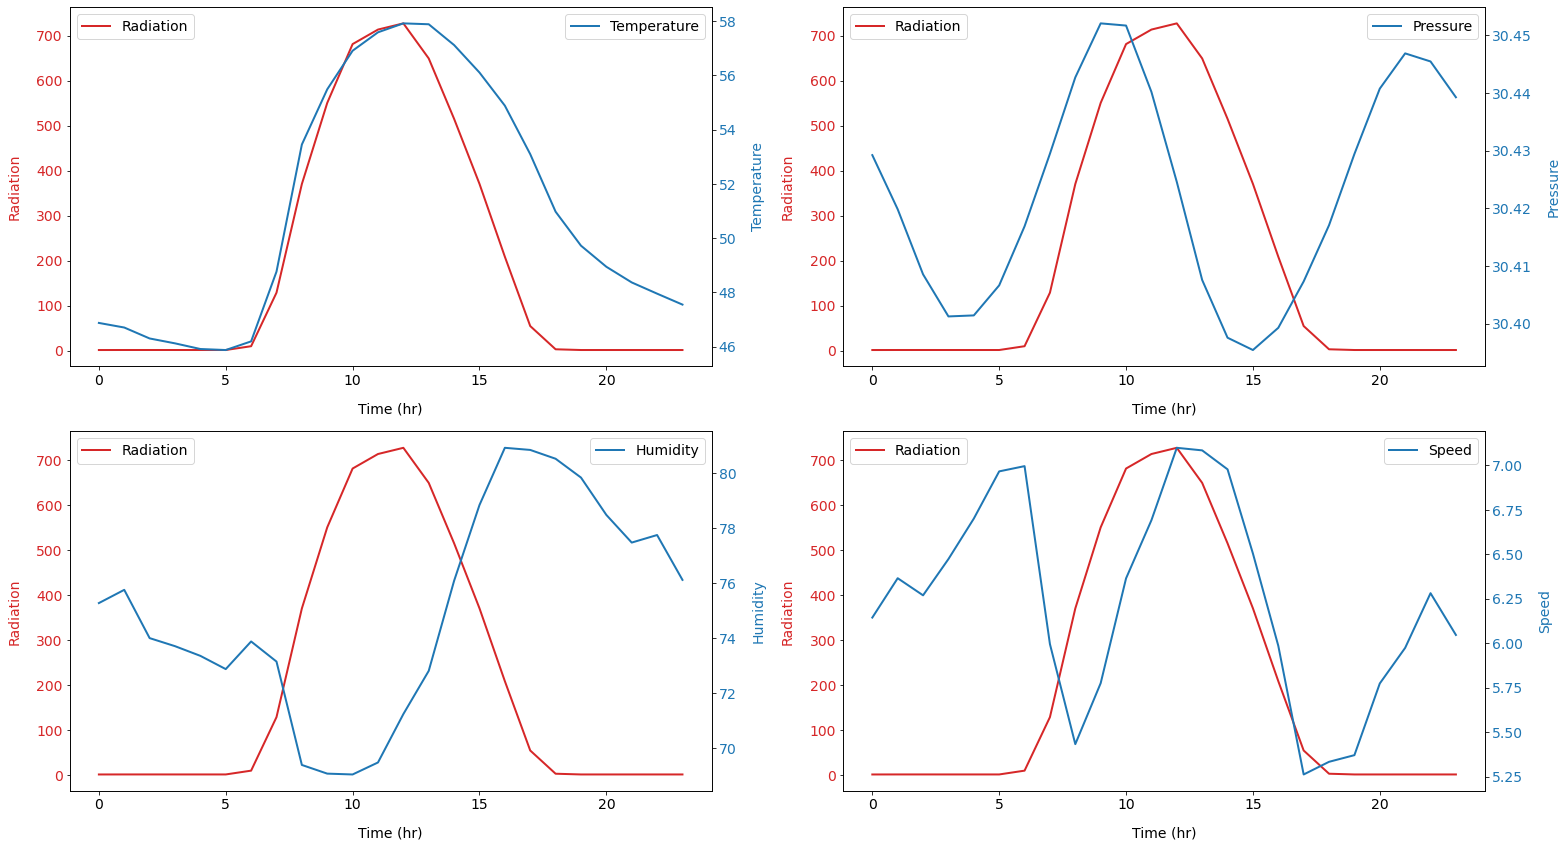

In [11]:
plt.rcParams["figure.figsize"] = (22, 12)

columns = ['Temperature',	'Pressure',	'Humidity',	'Speed']

hourlyY1 = defaultdict(list)
for index, row in df.iterrows():
  hourlyY1[row['Time']//3600].append(row['Radiation'])

hour = list(hourlyY1.keys())
Y1 = []
for hr in hour:
  Y1.append(sum(hourlyY1[hr])/len(hourlyY1[hr]))

for ind, ylabel in enumerate(columns):

  hourlyY2 = defaultdict(list)
  for index, row in df.iterrows():
    hourlyY2[row['Time']//3600].append(row[ylabel])

  hour = list(hourlyY2.keys())
  Y2 = []
  for hr in hour:
    Y2.append(sum(hourlyY2[hr])/len(hourlyY2[hr]))

  ax1 = plt.subplot(2, 2, ind+1)

  color = 'tab:red'
  ax1.set_xlabel('Time (hr)', labelpad=15)
  ax1.set_ylabel('Radiation', color=color, labelpad=15)
  ax1.plot(hour, Y1, color=color, linewidth=2, label='Radiation')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel(ylabel, color=color, labelpad=15)
  ax2.plot(hour, Y2, color=color, linewidth=2, label=ylabel)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')

plt.tight_layout()

In [12]:
df.drop(['TimeSunRise',	'TimeSunSet'], axis=1, inplace=True)

## Training and testing the models

In [13]:
!pip install xgboost==1.5.0

  Using cached xgboost-1.5.0-py3-none-manylinux2014_x86_64.whl (173.5 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [14]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

### Train-Test split

In [15]:
Y = df['Radiation'].values
df.drop(['Radiation'], axis=1, inplace=True)

X = df.values

RS = 1811

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=RS)

In [17]:
svr = SVR().fit(X_train, Y_train)
print('train', svr.score(X_train, Y_train))
print('test', svr.score(X_test, Y_test))

train 0.36578507845545116
test 0.366813493881182


### Predictions using standard models

In [18]:
lr = LinearRegression().fit(X_train, Y_train)
print('train', lr.score(X_train, Y_train))
print('test', lr.score(X_test, Y_test))

train 0.619041454379224
test 0.6259189940799947


In [19]:
mlp = MLPRegressor(random_state=RS).fit(X_train, Y_train)
print('train', mlp.score(X_train, Y_train))
print('test', mlp.score(X_test, Y_test))

train 0.7483717770298788
test 0.7491339597737856


In [20]:
dtr = DecisionTreeRegressor(random_state=RS).fit(X_train, Y_train)
print('train', dtr.score(X_train, Y_train))
print('train', dtr.score(X_test, Y_test))

train 1.0
train 0.8748831378034979


In [21]:
gbr = GradientBoostingRegressor(random_state=RS).fit(X_train, Y_train)
print('train', gbr.score(X_train, Y_train))
print('test', gbr.score(X_test, Y_test))

train 0.8910862921412004
test 0.8834760260949478


In [22]:
xgb = XGBRegressor(random_state=RS).fit(X_train, Y_train)
print('train', xgb.score(X_train, Y_train))
print('test', xgb.score(X_test, Y_test))

train 0.9698877981249413
test 0.9316061666810769


In [23]:
rfr = RandomForestRegressor(random_state=RS).fit(X_train, Y_train)
print('train', rfr.score(X_train, Y_train))
print('test', rfr.score(X_test, Y_test))

train 0.9906362391422517
test 0.9386715259723687


### Predictions using 2-level models

In [24]:
from sklearn.ensemble import StackingRegressor

def func(combine):
  estimators = [
                  ('mlp', mlp),
                  ('dt', dtr),
                  ('gbr', gbr),
                  ('rfr', rfr), 
                  ('xgb', xgb)
                ]
  final_estimator = combine
  reg = StackingRegressor(estimators=estimators,final_estimator=final_estimator)
  reg = reg.fit(X_train, Y_train)
  print('train', reg.score(X_train, Y_train))
  print('test', reg.score(X_test, Y_test))

In [25]:
func(SVR())

train 0.9804319897393173
test 0.9326423371224308


In [26]:
func(LinearRegression())

train 0.9877137422273785
test 0.9405644050920673


In [27]:
func(MLPRegressor(random_state=RS))

train 0.9865669573445389
test 0.9398641597127262


In [28]:
func(DecisionTreeRegressor(random_state=RS))

train 0.9347668850465967
test 0.8766826234694538


In [29]:
func(GradientBoostingRegressor(random_state=RS))

train 0.9829047551477743
test 0.9411687765685185


In [30]:
func(XGBRegressor(random_state=RS))

train 0.9777431979115137
test 0.9355048390504868


In [31]:
func(RandomForestRegressor(random_state=RS))

train 0.9814283430719959
test 0.9378301126652131


### Predictions using 3-level model

In [32]:
estimators1 = [
                ('mlp', mlp),
                ('dt', dtr),
                ('gbr', gbr),
                ('rfr', rfr), 
                ('xgb', xgb)
              ]

final_estimator21 = LinearRegression()
reg1 = StackingRegressor(estimators=estimators1, final_estimator=final_estimator21)
reg1.fit(X_train, Y_train)

final_estimator22 = GradientBoostingRegressor(random_state=RS)
reg2 = StackingRegressor(estimators=estimators1, final_estimator=final_estimator22)
reg2.fit(X_train, Y_train)

estimators2 = [
                ('reg1', reg1),
                ('reg2', reg2),
              ]

final_estimator3 = GradientBoostingRegressor(random_state=RS)
reg3 = StackingRegressor(estimators=estimators2,final_estimator=final_estimator3)
reg3.fit(X_train, Y_train)

print('train', reg3.score(X_train, Y_train))
print('test', reg3.score(X_test, Y_test))

train 0.9855358540552959
test 0.94165071265882
